In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv('C:\\Users\\IOAN\\Downloads\\Santos-home\\spotify_reviews.csv')
df

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\IOAN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IOAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494
...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973


In [3]:
def stars_to_sentiment(stars):
    if stars <= 2:
        return 'negative'
    elif stars == 3:
        return 'neutral'
    else:
        return 'positive'
    
df['sentiment'] = df['score'].apply(stars_to_sentiment)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative
...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive


In [5]:
#data cleaning 1 (tokenizing)
def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(filtered_tokens)

df['processed_content'] = df['content'].apply(preprocess_text)
df

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,sentiment,processed_content
0,437314fe-1b1d-4352-abea-12fec30fce58,Rajib Das,It's good,4,0,NaN,2024-05-09 16:28:13,NaN,positive,good
1,4933ad2c-c70a-4a84-957d-d405439b2e0f,Mihaela Claudia Neagu,"I love this app so much, I've been using Spoti...",5,0,8.9.38.494,2024-05-09 16:27:18,8.9.38.494,positive,love app much using spotify 2 years different ...
2,1ab275fb-59bf-42c7-88ef-b85901f0445e,JONATHAN GRACIA,Perfect,5,0,8.9.36.616,2024-05-09 16:27:03,8.9.36.616,positive,perfect
3,b38406eb-7b11-4ceb-a45c-d7f28fb5d382,Cam Rempel,Best all around music streaming app I have use...,5,0,8.9.38.494,2024-05-09 16:26:19,8.9.38.494,positive,best around music streaming app used family pl...
4,7be7999d-4cb6-47b9-8414-d7bdaa9df578,Your clowness (Her Clowness),Are y'all fr gatekeeping the play button on so...,1,0,8.9.38.494,2024-05-09 16:26:14,8.9.38.494,negative,fr gatekeeping play button songs
...,...,...,...,...,...,...,...,...,...,...
84160,b41ccea7-2805-458a-bd70-547ff07ddb95,Marlena Scott,The most decent music streaming app around rig...,3,2,8.5.55.1105,2020-04-30 10:02:07,8.5.55.1105,neutral,decent music streaming app around right kinks ...
84161,456cbd4f-d9b5-4d7b-8a7d-caab7593431e,A Google user,"As a premium user for a few years, Spotify is ...",4,0,8.5.27.957,2019-10-11 16:28:13,8.5.27.957,positive,premium user years spotify fantastic service u...
84162,33317821-01e1-4207-964f-ae8109a0d6b3,Supriya Deepak,"There is lot of ads all of a sudden, and it's ...",3,0,NaN,2020-11-27 14:14:34,NaN,neutral,lot ads sudden even watch video want uninterru...
84163,98acdcd9-a1e8-4d49-9fc8-1aee84d14383,A Google user,The UI could be better. I think there should b...,4,1,8.5.49.973,2020-03-28 03:50:24,8.5.49.973,positive,ui could better think search bar times liked s...


In [6]:
df_reviews = df[['processed_content', 'score', 'sentiment']]
df_reviews

,processed_content,score,sentiment
0,good,4,positive
1,love app much using spotify 2 years different ...,5,positive
2,perfect,5,positive
3,best around music streaming app used family pl...,5,positive
4,fr gatekeeping play button songs,1,negative
...,...,...,...
84160,decent music streaming app around right kinks ...,3,neutral
84161,premium user years spotify fantastic service u...,4,positive
84162,lot ads sudden even watch video want uninterru...,3,neutral
84163,ui could better think search bar times liked s...,4,positive


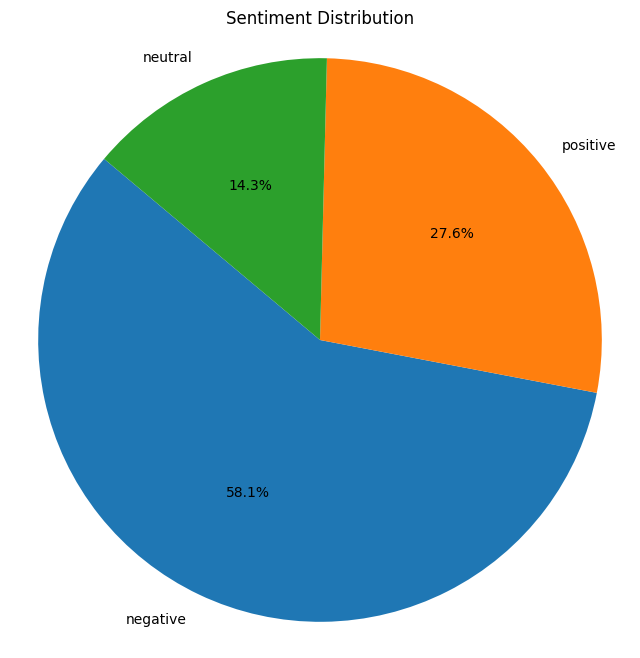

In [7]:
from matplotlib import pyplot as plt
import numpy as np

sentiment_count = df_reviews['sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(sentiment_count, labels=sentiment_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(df_reviews['processed_content'], df_reviews['sentiment'], test_size=0.2,
                                                    random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=3, max_df=0.9)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [9]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.70      0.99      0.82      9791
     neutral       0.00      0.00      0.00      2405
    positive       0.89      0.56      0.69      4637

    accuracy                           0.73     16833
   macro avg       0.53      0.52      0.50     16833
weighted avg       0.65      0.73      0.66     16833



C:\Users\IOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\IOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\IOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [8]:
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([processed_review])
    sentiment = model.predict(vectorized_review)[0]
    return sentiment

In [9]:
new_review = "The app is good but it will start to ask premium.....it should be controlled"
print(f"Predicted:sentiment: {predict_sentiment(new_review)}")

Predicted:sentiment: negative


In [10]:
# Data augmentation techniques
def augment_text(text, num_augmentations=1):
    """Simple augmentation by synonym replacement and random word removal"""
    if not isinstance(text, str) or len(text) < 5:
        return [text] * num_augmentations
    
    augmented_texts = [text]
    words = text.split()
    
    if len(words) <= 3:
        return [text] * num_augmentations
    
    # Simple word removal
    for _ in range(num_augmentations):
        num_to_remove = max(1, int(len(words) * 0.1))
        remove_indices = np.random.choice(range(len(words)), num_to_remove, replace=False)
        new_text = ' '.join([words[i] for i in range(len(words)) if i not in remove_indices])
        augmented_texts.append(new_text)
    
    # Simple word order shuffle for sentences longer than 5 words
    if len(words) > 5:
        mid_words = words[1:-1]
        np.random.shuffle(mid_words)
        shuffled_text = ' '.join([words[0]] + mid_words + [words[-1]])
        augmented_texts.append(shuffled_text)
    
    return augmented_texts

In [11]:
# Create balanced training data with augmentation
def create_balanced_data(df):
    sentiment_counts = df['sentiment'].value_counts()
    max_samples = sentiment_counts.max()
    balanced_texts = []
    balanced_sentiments = []
    
    for sentiment in ['positive', 'negative', 'neutral']:
        sentiment_df = df[df['sentiment'] == sentiment]
        current_count = len(sentiment_df)
        
        # If we need more samples of this sentiment
        if current_count < max_samples:
            # How many augmentations per original sample (approximately)
            augmentations_needed = int(np.ceil((max_samples - current_count) / current_count))
            
            for _, row in sentiment_df.iterrows():
                # Add the original text
                balanced_texts.append(row['processed_content'])
                balanced_sentiments.append(sentiment)
                
                # Add augmented versions
                augmented = augment_text(row['processed_content'], augmentations_needed)
                for aug_text in augmented[1:]:  # Skip the first one, it's the original
                    balanced_texts.append(aug_text)
                    balanced_sentiments.append(sentiment)
                    
                    # Break if we've reached enough samples
                    if len(balanced_texts) - len(balanced_sentiments) + sum(np.array(balanced_sentiments) == sentiment) >= max_samples:
                        break
        else:
            # Just take original samples
            sampled_df = sentiment_df.sample(max_samples, replace=False)
            balanced_texts.extend(sampled_df['processed_content'].tolist())
            balanced_sentiments.extend([sentiment] * max_samples)
    
    return balanced_texts, balanced_sentiments

In [12]:

# Apply data augmentation to create balanced dataset
balanced_texts, balanced_sentiments = create_balanced_data(df_reviews)
balanced_df = pd.DataFrame({
    'processed_content': balanced_texts,
    'sentiment': balanced_sentiments
})

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['processed_content'], 
    balanced_df['sentiment'], 
    test_size=0.2,
    random_state=42,
    stratify=balanced_df['sentiment']
)

# Original test data (without augmentation for fair evaluation)
orig_X_train, orig_X_test, orig_y_train, orig_y_test = train_test_split(
    df_reviews['processed_content'], 
    df_reviews['sentiment'], 
    test_size=0.2,
    random_state=42
)

# Create and fit TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    ngram_range=(1, 2),
    min_df=3,
    max_df=0.9,
    sublinear_tf=True,  # Apply sublinear tf scaling
    use_idf=True,
    smooth_idf=True
)

# Train model on augmented data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(orig_X_test)  # Test on original data

In [14]:
# Create and train the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.1)  # Lower alpha for better precision
model.fit(X_train_vectorized, y_train)

# Print classification report
y_pred = model.predict(X_test_vectorized)
print("Classification Report (after data augmentation):")
print(classification_report(orig_y_test, y_pred))

# Function to predict sentiment for new reviews
def predict_sentiment(review):
    processed_review = preprocess_text(review)
    vectorized_review = vectorizer.transform([processed_review])
    sentiment = model.predict(vectorized_review)[0]
    return sentiment

# Test the model on a new review
new_review = "The app is good but it will start to ask premium.....it should be controlled"
print(f"Predicted sentiment: {predict_sentiment(new_review)}")

Classification Report (after data augmentation):
              precision    recall  f1-score   support

    negative       0.95      0.94      0.94      9791
     neutral       0.84      0.87      0.85      2405
    positive       0.91      0.91      0.91      4637

    accuracy                           0.92     16833
   macro avg       0.90      0.91      0.90     16833
weighted avg       0.92      0.92      0.92     16833

Predicted sentiment: negative


In [15]:
import joblib

# Save the model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']